In de volgende code wordt de uitgerekende ODE van onze motor gebruikt om de verschillende activatie patronen te visualizeren (Step & Puls-response)
$$
\frac{d^2u}{dt^2} = -\frac{(r b + k^2)}{r J_m} \frac{du}{dt} + \frac{k}{r J_m} U(t)
$$
Wij gebruiken Eulers methode om de ODE te benaderen. Hierbij wordt aangenomen dat de startconditie $y(0)=0$ is en de stapgrootte is $h=0.01$

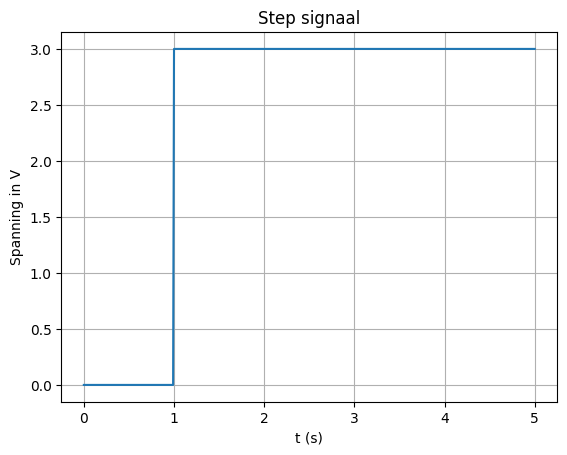

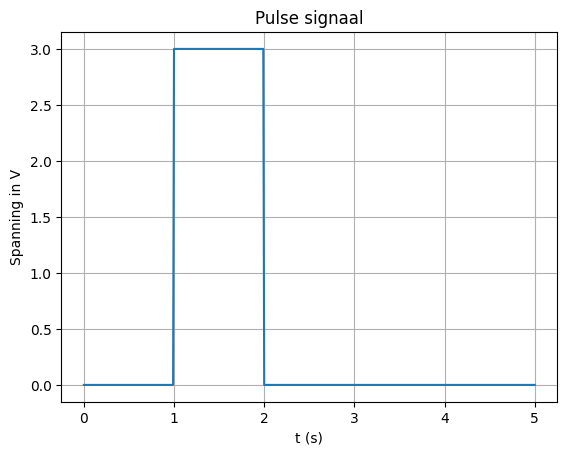

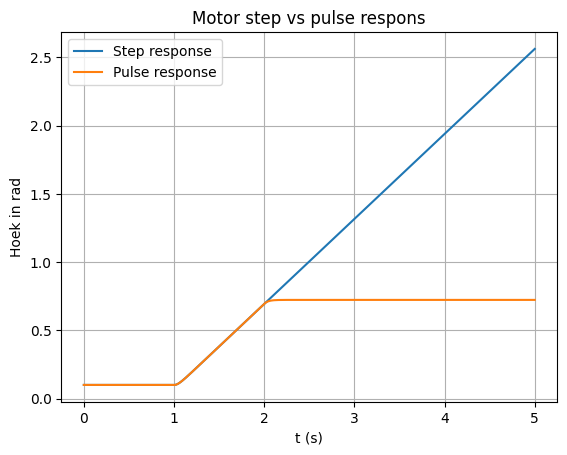

In [6]:
import numpy as np
import matplotlib.pyplot as plt

k = 0.28 
b = 0.1        # Wrijving
r = 12.7       # Motor weerstand
Jm = 5.1*10**-3  # Versimpelde massatraagheid van Balk 
omega_coefficient = ((r*b) + k**2) / (r*Jm)

T = 5         # Tijd
h = 0.01       # stepsize
N_t = int(round(T/h))  # number of steps
x = np.linspace(0, N_t * h, N_t + 1)  # time array


u_step0 = np.zeros(N_t + 1)
u_step0[x >= 1] = 3.0         # Step aanmaken met bepaalde voltage (nu 3v)

u_pulse0 = np.zeros(N_t + 1)
u_pulse0[(x >= 1) & (x < 2)] = 3.0       # Puls aanmaken met bepaalde votlage (nu 3v)


u_step = np.zeros(N_t + 1)
v_step = np.zeros(N_t + 1)
u_step[0] = 0.1 # init positie
v_step[0] = 0.0 # init hoeksnelhed

for n in range(N_t):
    u_step[n+1] = u_step[n] + h * v_step[n]
    v_step[n+1] = v_step[n] + h * (-omega_coefficient * v_step[n] + (k/(r*Jm)) * u_step0[n])


u_pulse = np.zeros(N_t + 1)
v_pulse = np.zeros(N_t + 1)
u_pulse[0] = 0.1 # init positie
v_pulse[0] = 0.0 # init hoeksnelheid

for n in range(N_t):
    u_pulse[n+1] = u_pulse[n] + h * v_pulse[n]
    v_pulse[n+1] = v_pulse[n] + h * (-omega_coefficient * v_pulse[n] + (k/(r*Jm)) * u_pulse0[n])


plt.plot(x, u_step0)
plt.xlabel('t (s)')
plt.ylabel('Spanning in V')
plt.title('Step signaal')
plt.grid(True)
plt.show()

plt.plot(x, u_pulse0)
plt.xlabel('t (s)')
plt.ylabel('Spanning in V')
plt.title('Pulse signaal')
plt.grid(True)
plt.show()

plt.plot(x, u_step, label='Step response', color='tab:blue')
plt.plot(x, u_pulse, label='Pulse response', color='tab:orange')
plt.xlabel('t (s)')
plt.ylabel('Hoek in rad')
plt.title('Motor step vs pulse respons')
plt.legend()
plt.grid(True)
plt.show()

In de code hieronder wordt de uitgerekende ODE van onze motor gebruikt om het dynamische gedrag van de DC motor te visualizeren op een tijdafhankelijke ingangsspanning U(t) = cos(t)
$$
\frac{d^2u}{dt^2} = -\frac{(r b + k^2)}{r J_m} \frac{du}{dt} + \frac{k}{r J_m} \cos(t)
$$
hier is de startconditie $y(0)=0$ is en de stapgrootte is $h=0.01$

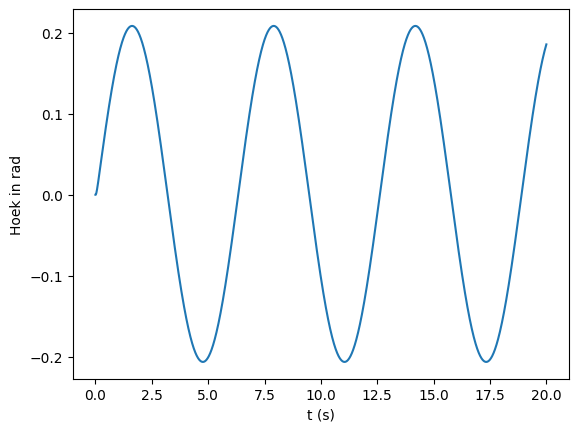

In [50]:
import numpy as np
import matplotlib.pyplot as plt

k = 0.28 
b = 0.1 # Wrijving 
# b = 1 als de wrijving maal 10 omhoog gaat, gaat de afstand :10  #
r = 12.7 # Motor weerstand
Jm = 5.1*10**-3 # Versimpelde massatraagheid van Balk
omega_coefficient = ((r*b )+ k**2)/(r*Jm) 
T = 20 #Tijd
h = 0.01 # Kleinere stepsize geeft niet beter resultaat
# h = 0.096 Grootste acceptabele stepsize #

N_t = int(round(T/h)) # Aantal steps
x = np.linspace(0, N_t * h, N_t + 1) 
u = np.zeros(N_t + 1)
v = np.zeros(N_t + 1)
# Initiele condities
u[0] = 0 # initiele positie
v[0] = 0 # initiele snelheid



# Door tijd loopen
for n in range(N_t):
    u[n+1] = u[n] + h * v[n]
    v[n+1] = v[n] + h * (-omega_coefficient*v[n]+ 0*u[n]+((k/(r*Jm))*np.cos(h*n)))
    
# Plot grafieken    

plt.plot(x, u)
plt.xlabel('t (s)')
plt.ylabel('Hoek in rad')
plt.title('')
plt.show()

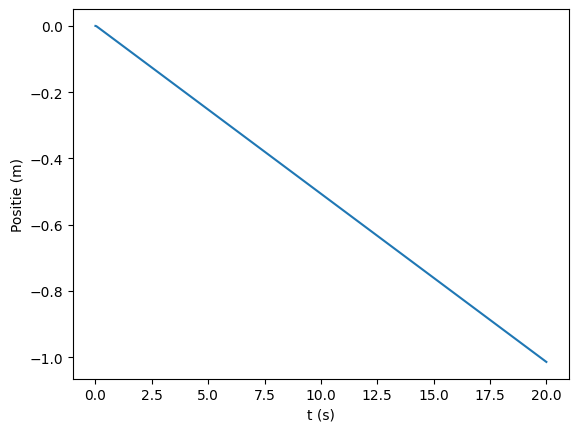

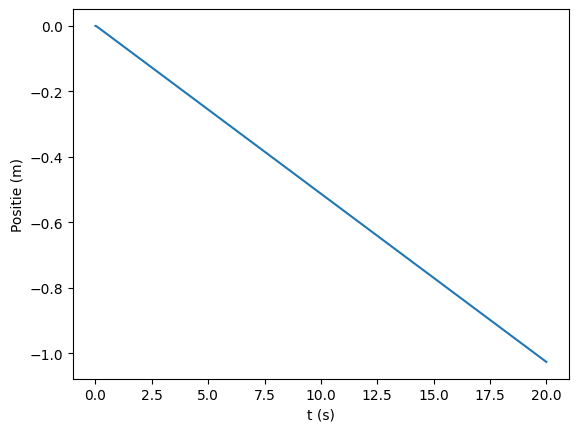

In [3]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81 
r = 0.02 # Radius van de bal (m)
m = 0.05 # Massa van de bal (kg)
b = 0.05 # Wrijving
T = 20 #Tijd
h = 0.01 # werkt mooi
# h = 0.0569 # misschien floating point fouten??

N_t = int(round(T/h)) # Aantal steps
x = np.linspace(0, N_t * h, N_t + 1) 
u = np.zeros(N_t + 1)
v = np.zeros(N_t + 1)
# Initiele condities
u[0] = 0 # initiele positie
v[0] = 0 # initiele snelheid



# Door tijd loopen ( not linear)
for n in range(N_t):
    u[n+1] = u[n] + h * v[n]
    v[n+1] = v[n] + h * (((-5*b)/(7*r*m)) * v[n] -((5/7) * g * np.sin(np.pi/12))) # step op hoek van balk = 15 graden
    # v[n+1] = v[n] + h * (((-5*b)/(7*r*m)) * v[n] -((5/7) * g * np.sin(np.sin(h*n)))) # hoek van balk varieert als golf.
    
# Plot grafieken    

plt.plot(x, u)
plt.title('non-linearized')
plt.xlabel('t (s)')
plt.ylabel('Positie (m)')
plt.title('')
plt.show()

# Door tijd loopen (linear)
for n in range(N_t):
    u[n+1] = u[n] + h * v[n]
    v[n+1] = v[n] + h * (((-5*b)/(7*r*m)) * v[n] -((5/7) * g * np.pi/12))

# Plot grafieken    

plt.plot(x, u)
plt.title('Linearized')
plt.xlabel('t (s)')
plt.ylabel('Positie (m)')
plt.title('')
plt.show()

S - domein!

closedloop tf=  <TransferFunction>: sys[163]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                 33.51 s + 2.011
  ---------------------------------------------
  s^4 + 8.393 s^3 + 8.929 s^2 + 33.51 s + 2.011
openloop tf=  <TransferFunction>: sys[159]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

             6.702
  ---------------------------
  s^4 + 8.393 s^3 + 8.929 s^2


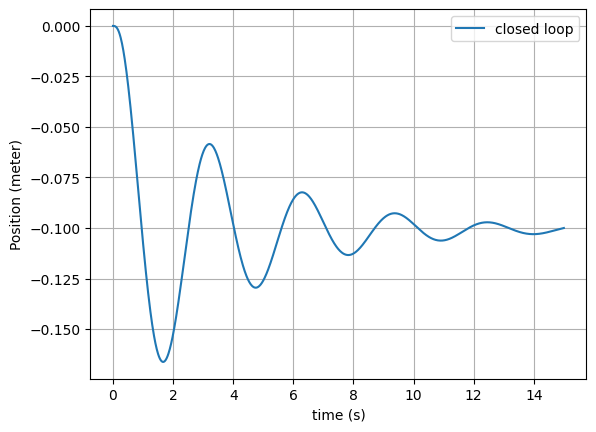

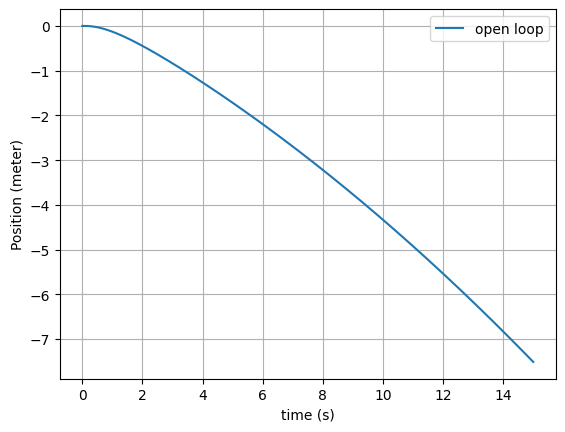

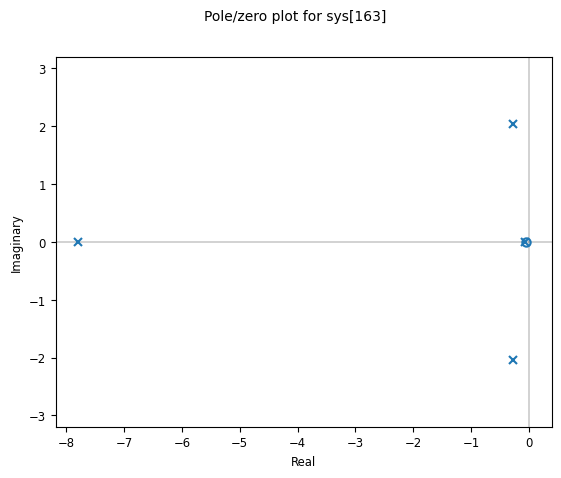

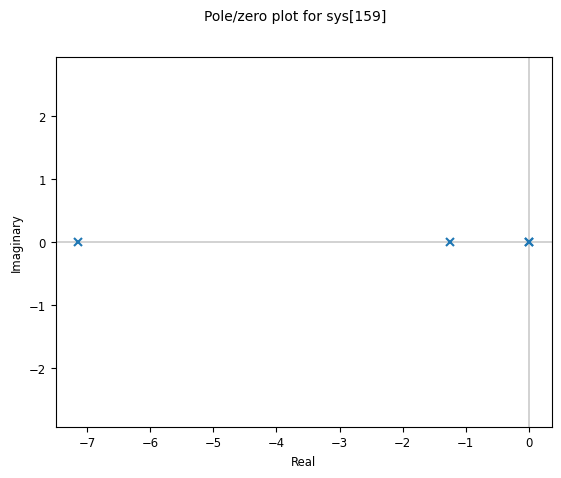

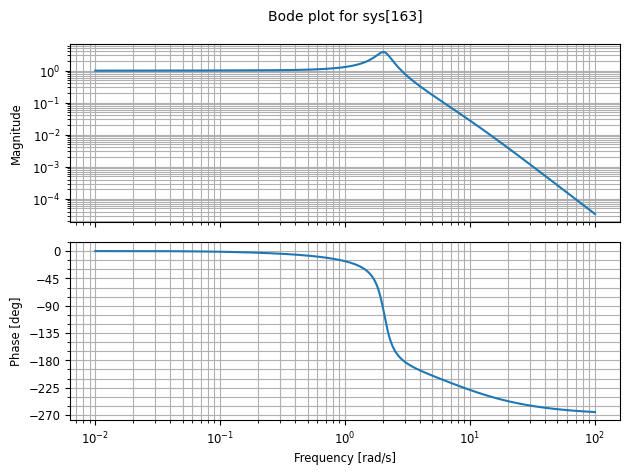

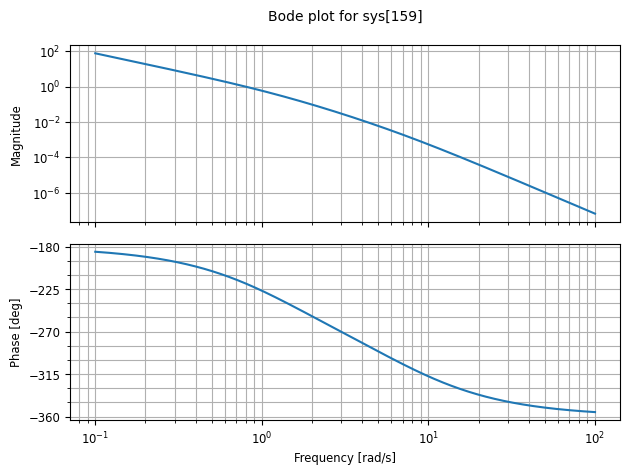

In [ ]:
import array
import control as ctl
import numpy as np
from control import *
import matplotlib.pyplot as plt

g = 9.81
d = 0.0375
L = 0.1725
b = 0.01 # changes things significantly
m = 0.05 # weight of ball
R = 0.02

s = ctl.TransferFunction.s

K = 4.4
T = 0.8

Kp = 0.3
Ki = 0
Kd = 5
H_pid = Kp + Ki/s + Kd*s

num = [(5/7)*g*(d / L)]
den = [1, (5/7)*(b / (R*m)), 0]

H_sys = tf(num, den)

integrator = 1/s
H_motorspeed = (K/(s+(1/T)))
H_motorposition = integrator * H_motorspeed

H_openloop = H_sys*H_motorposition
H_total = H_sys*H_motorposition*H_pid


H_closedloop = feedback(H_total, 1)

print('closedloop tf= ', H_closedloop)
print('Zie geen zero^')
print('openloop tf= ', H_openloop)
print('Wel zero^')

t = np.linspace(0, 15, 1000)

setpoint = -0.1

timeArr = np.ones_like(t) * setpoint

t, y = forced_response(H_closedloop, T = t, U = timeArr)
t2, y2 = forced_response(H_total, T = t, U = timeArr)

plt.figure()
plt.plot(t,y, label='closed loop')
plt.grid()
plt.xlabel('tijd (s)')
plt.ylabel('Positie (meter)')
plt.legend()

plt.figure()
plt.plot(t2,y2, label='open loop')
plt.grid()
plt.xlabel('tijd (s)')
plt.ylabel('Positie (meter)')
plt.legend()

plt.figure()
pole_zero_plot(H_closedloop)

plt.figure()
pole_zero_plot(H_openloop)

plt.figure()
bode_plot(H_closedloop, Hz = False)

plt.figure()
bode_plot(H_openloop, Hz = False)